## MAGMA Financial Stock Analysis

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2022:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Meta (NASDAQ:META).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [1]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [2]:
import pandas_datareader as web

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [3]:
import matplotlib.pyplot as plt
# allow visualizations to appear beneath the code to generate them
%matplotlib inline 

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [4]:
symbols = ["MSFT", "AMZN", "GOOG", "META", "AAPL"]
start_date = "2022-01-01"
end_date = "2022-07-01"

stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [5]:
stock_data.head()

Attributes   Adj Close                                                  \
Symbols           MSFT        AMZN        GOOG        META        AAPL   
Date                                                                     
2022-01-03  333.282990  170.404495  145.074493  338.540009  181.511703   
2022-01-04  327.568176  167.522003  144.416504  336.529999  179.208038   
2022-01-05  314.993530  164.356995  137.653503  324.170013  174.441132   
2022-01-06  312.504456  163.253998  137.550995  332.459991  171.529114   
2022-01-07  312.663757  162.554001  137.004501  331.790009  171.698654   

Attributes       Close                                                  ...  \
Symbols           MSFT        AMZN        GOOG        META        AAPL  ...   
Date                                                                    ...   
2022-01-03  334.750000  170.404495  145.074493  338.540009  182.009995  ...   
2022-01-04  329.010010  167.522003  144.416504  336.529999  179.699997  ...   
2022-01-05  316.380005  164.356995  137.653503  324.170013  174.919998  ...   
2022-01-06  313.880005  163.253998  137.550995  332.459991  172.000000  ...   
2022-01-07  314.040009  162.554001  137.004501  331.790009  172.169998  ...   

Attributes        Open                                                  \
Symbols           MSFT        AMZN        GOOG        META        AAPL   
Date                                                                     
2022-01-03  335.350006  167.550003  144.475494  338.299988  177.830002   
2022-01-04  334.829987  170.438004  145.550507  339.950012  182.630005   
2022-01-05  325.859985  166.882996  144.181000  333.019989  179.610001   
2022-01-06  313.149994  163.450500  137.497498  322.820007  172.699997   
2022-01-07  314.149994  163.839005  137.904999  332.739990  172.889999   

Attributes      Volume                                                   
Symbols           MSFT        AMZN        GOOG        META         AAPL  
Date                                                                     
2022-01-03  28865100.0  63520000.0  25214000.0  14537900.0  104487900.0  
2022-01-04  32674300.0  70726000.0  22928000.0  15998000.0   99310400.0  
2022-01-05  40054300.0  64302000.0  49642000.0  20564500.0   94537600.0  
2022-01-06  39646100.0  51958000.0  29050000.0  27962800.0   96904000.0  
2022-01-07  32720000.0  46606000.0  19408000.0  14722000.0   86709100.0  

[5 rows x 30 columns]

### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

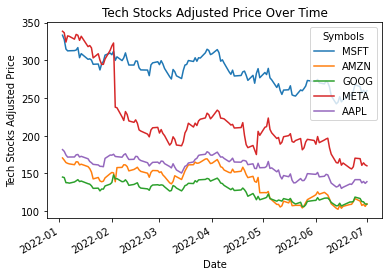

In [6]:
# plt.plot(x=stock_data["Date"], y=stock_data["Adjusted Closing Price Over Time"])

stock_data_closing_prices = stock_data['Adj Close']
stock_data_closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Tech Stocks Adjusted Price")
plt.title("Tech Stocks Adjusted Price Over Time")
plt.show()

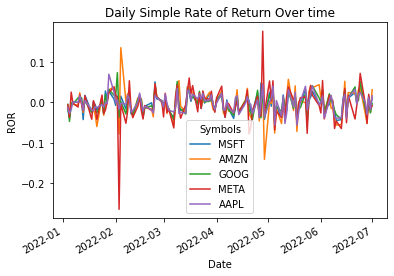

<Figure size 1152x648 with 0 Axes>

In [7]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

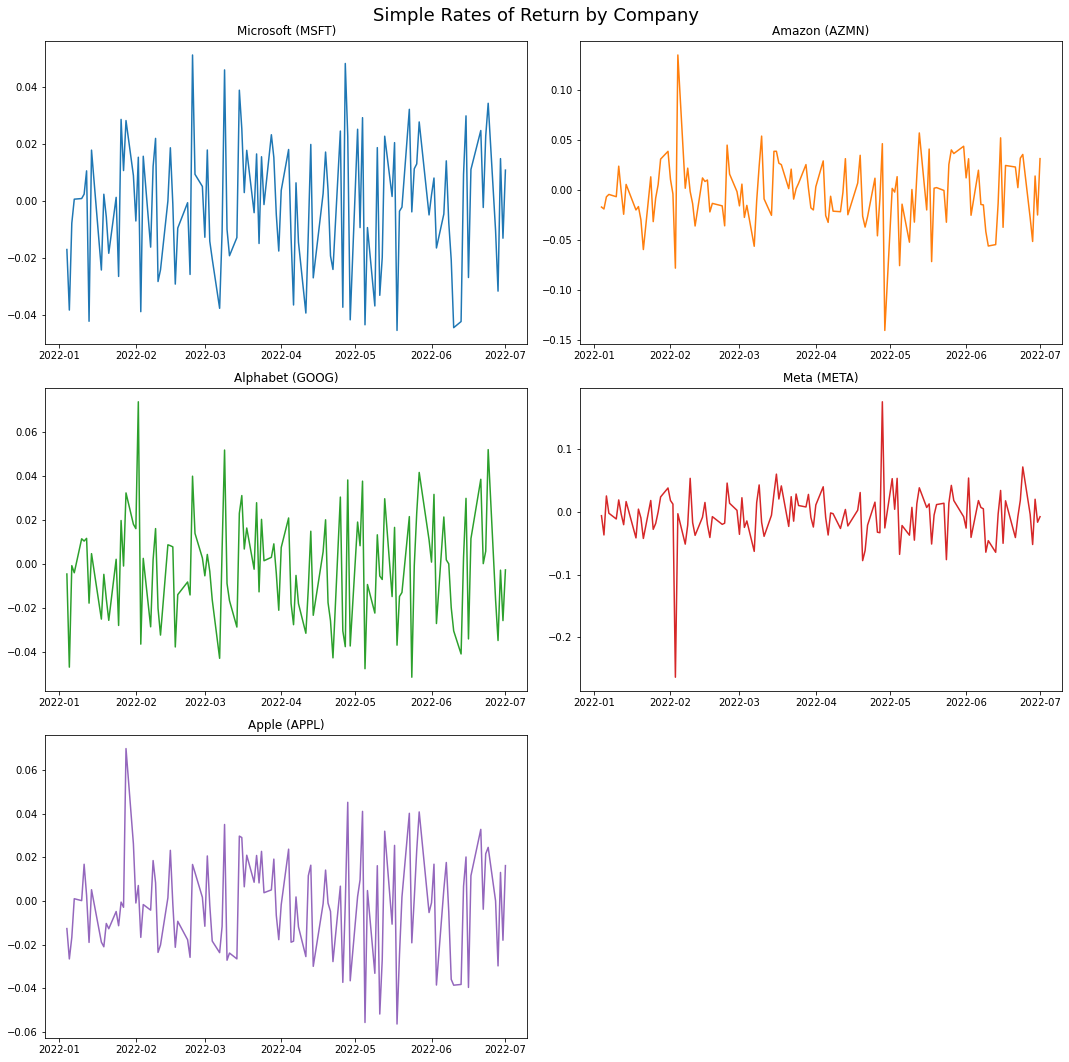

In [8]:
fig = plt.figure(figsize=(15,15))
fig.suptitle("Simple Rates of Return by Company", fontsize=18)

ax_msft = fig.add_subplot(3, 2, 1)
ax_amzn = fig.add_subplot(3, 2, 2)
ax_goog = fig.add_subplot(3, 2, 3)
ax_meta = fig.add_subplot(3, 2, 4)
ax_aapl = fig.add_subplot(3, 2, 5)

ax_msft.plot(stock_data['Adj Close']['MSFT'].pct_change())
ax_msft.set_title("Microsoft (MSFT)")
ax_amzn.plot(stock_data['Adj Close']['AMZN'].pct_change(), 'tab:orange')
ax_amzn.set_title("Amazon (AZMN)")
ax_goog.plot(stock_data['Adj Close']['GOOG'].pct_change(), 'tab:green')
ax_goog.set_title("Alphabet (GOOG)")
ax_meta.plot(stock_data['Adj Close']['META'].pct_change(), 'tab:red')
ax_meta.set_title("Meta (META)")
ax_aapl.plot(stock_data['Adj Close']['AAPL'].pct_change(), 'tab:purple')
ax_aapl.set_title("Apple (APPL)")

plt.tight_layout()
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [9]:
daily_mean = stock_data_daily_returns.mean() * -1

daily_mean

Symbols
MSFT    0.001767
AMZN    0.002986
GOOG    0.002015
META    0.005092
AAPL    0.001902
dtype: float64

In [10]:
daily_mean.keys()

Index(['MSFT', 'AMZN', 'GOOG', 'META', 'AAPL'], dtype='object', name='Symbols')

In [11]:
# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
    
np.negative(height)

array([-0.0017666 , -0.00298623, -0.00201468, -0.00509154, -0.00190227])

In [12]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4])

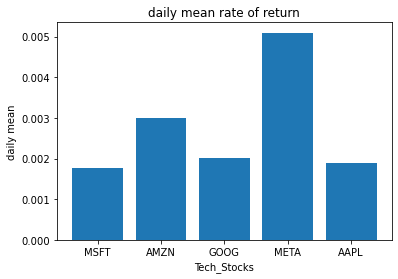

In [13]:
plt.figure()

# plot bars
plt.bar(x_pos, height)

# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("daily mean")
plt.title("daily mean rate of return")

# show graphic
plt.show()

Meta has the highest mean simple rate of return over the period of data collected. Thus Meta would have been a good choice for investment over this period of time. Microsoft, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [14]:
# calculate variance
daily_var = stock_data_daily_returns.var()
daily_var

Symbols
MSFT    0.000496
AMZN    0.001138
GOOG    0.000570
META    0.001781
AAPL    0.000506
dtype: float64

In [15]:
# daily mean index for the x axis
daily_var.keys()

Index(['MSFT', 'AMZN', 'GOOG', 'META', 'AAPL'], dtype='object', name='Symbols')

In [16]:
# grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
height

[0.0004963178018198351,
 0.0011383976252339273,
 0.0005699808890630467,
 0.0017811923807899248,
 0.0005062374787318491]

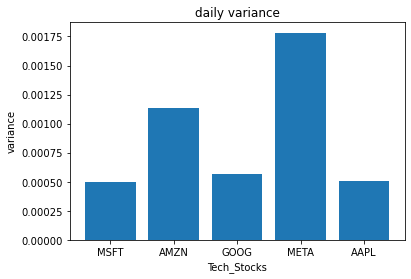

In [17]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_var.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")

# show graphic
plt.show()

Meta shows the highest variance of all the stocks by a large margin, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

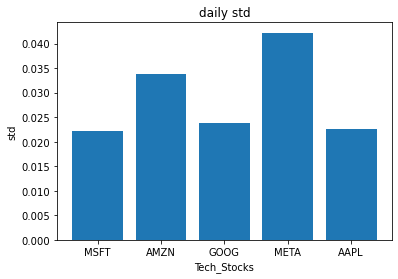

In [18]:
# calculate standard deviation
daily_std = stock_data_daily_returns.std()
daily_std

# standard deviation index for the x axis
daily_var.keys()

# grab each standard deviation value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height

# arrange keys on x axis based on length
x_pos = np.arange(len(daily_std.keys()))
x_pos

# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std")

# show graphic
plt.show()

The answer to this question depends on your investment preferences. Facebook is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [19]:
stock_data_closing_prices.corr()

Symbols,MSFT,AMZN,GOOG,META,AAPL
Symbols,,,,,
MSFT,1.000000,0.920010,0.943236,0.759546,0.947686
AMZN,0.920010,1.000000,0.948133,0.594530,0.933416
GOOG,0.943236,0.948133,1.000000,0.650612,0.930515
META,0.759546,0.594530,0.650612,1.000000,0.656287
AAPL,0.947686,0.933416,0.930515,0.656287,1.000000


None of the stocks are negatively correlated. Microsoft and Google are highly correlated, while Facebook and Apple exhibit the lowest correlation.

TODO: Regression of stocks over time.